In [62]:
!rm galFiltered.sif Affinity\ Purification.cys All\ Predicates.filter
!wget -q https://raw.githubusercontent.com/bdemchak/cytoscape-jupyter/main/sanity-test/data/galFiltered.sif
!wget -q https://raw.githubusercontent.com/bdemchak/cytoscape-jupyter/main/sanity-test/data/Affinity%20Purification.cys
!wget -q https://raw.githubusercontent.com/bdemchak/cytoscape-jupyter/main/sanity-test/data/All%20Predicates.filter
!mkdir output
!ls -l
DATA_DIR=''
OUTPUT_DIR='output/'

mkdir: cannot create directory ‘output’: File exists
total 1056
-rw-r--r-- 1 root root 1054245 Oct 26 18:58 'Affinity Purification.cys'
-rw-r--r-- 1 root root    3969 Oct 26 18:58 'All Predicates.filter'
-rw-r--r-- 1 root root    7181 Oct 26 18:58  galFiltered.sif
drwxr-xr-x 2 root root    4096 Oct 26 18:47  logs
drwxr-xr-x 2 root root    4096 Oct 26 18:41  output
drwxr-xr-x 1 root root    4096 Oct 14 16:31  sample_data


---
#Startup: Establish link to Google Drive
**You'll be prompted for a credential, and the prompt will have instructions for getting it. Once you enter it, Google Drive files will be available as '/gdrive/My Drive/xxx' where 'xxx is a file name or path with your Google Drive.**

Source for this method: https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/

You can examine the Google Drive on your own by adding this to a cell:

!ls "/gdrive/My Drive/data"

The Google Drive API is documented [here](https://developers.google.com/drive/api/v3/about-sdk).




In [ ]:
from google.colab import drive
drive.mount('/gdrive')
DATA_DIR = '/gdrive/My Drive/data/'
OUTPUT_DIR = DATA_DIR + 'output/'
print('Successfully mounted Google drive')

Mounted at /gdrive
Successfully mounted Google drive


---
#Startup: Fetch latest py4cytoscape
**Note that you can fetch from a specific github branch by adding "@\<branch>" to the "py4cytocape" at the end of the github URL.**

For example, to get branch 0.0.5: git+https://github.com/cytoscape/py4cytoscape@0.0.5



In [53]:
!pip uninstall -y py4cytoscape

#!pip install py4cytoscape
#!pip install git+https://github.com/cytoscape/py4cytoscape@0.0.5
!pip install git+https://github.com/cytoscape/py4cytoscape

Uninstalling py4cytoscape-0.0.6:
  Successfully uninstalled py4cytoscape-0.0.6
  Cloning https://github.com/cytoscape/py4cytoscape to /tmp/pip-req-build-rpxjisux
  Running command git clone -q https://github.com/cytoscape/py4cytoscape /tmp/pip-req-build-rpxjisux
  Created wheel for py4cytoscape: filename=py4cytoscape-0.0.6-cp36-none-any.whl size=138436 sha256=1d6440fd04150c722a324fde9cfce584d42b05e5bf6f4b613ef4ce05a1abf166
  Stored in directory: /tmp/pip-ephem-wheel-cache-30jlm4ek/wheels/06/8f/c8/700e4a3952b6b9731bcd7f8f6bb6c4cf02ebf9633e4af67184
Successfully built py4cytoscape


---
#Startup: Set up Cytoscape connection


In [54]:
import IPython
import py4cytoscape as p4c
print(f'Loading Javascript client ... {p4c.get_browser_client_channel()} on {p4c.get_jupyter_bridge_url()}')
browser_client_js = p4c.get_browser_client_js()
IPython.display.Javascript(browser_client_js) # Start browser client


Loading Javascript client ... e468c68f-5fa2-431a-89ce-78df62b907d6 on https://jupyter-bridge.cytoscape.org


<IPython.core.display.Javascript object>

---
# Sanity test: Cytoscape version


In [55]:
p4c.cytoscape_version_info()


{'apiVersion': 'v1',
 'automationAPIVersion': '1.0.0',
 'cytoscapeVersion': '3.8.1',
 'jupyterBridgeVersion': '0.0.1',
 'py4cytoscapeVersion': '0.0.6'}

---
# Sanity test: Cytoscape's sandbox path

**Sandboxing is explained in https://py4cytoscape.readthedocs.io/en/latest/concepts.html#sandboxing**

In [57]:
p4c.sandbox_get_file_info('.')

{'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox',
 'isFile': False,
 'modifiedTime': '2020-10-26 11:48:02.0107'}

---
#Demo: Load standard Cytoscape sample session

assert() checks verify that function result was plausible

In [58]:
assert(p4c.open_session() == {})
assert(p4c.get_network_count() == 1)
assert(p4c.get_network_name() == 'galFiltered.sif')
print('Successfully opened sample session')

Opening sampleData/sessions/Yeast Perturbation.cys...
Successfully opened sample session


---
# Demo: Download and load my session

**This is a big session, so loading it may take a minute to download it to the sandbox and then load it into Cytoscape.**

assert() checks verify that function result was plausible

In [63]:
p4c.sandbox_send_to(DATA_DIR + 'Affinity Purification.cys')
print('Successfully downloaded session ... beginning session load ...')
assert(p4c.open_session('Affinity Purification.cys') == {})
assert(p4c.get_network_count() == 1)
assert(p4c.get_network_name() == 'HIV-human PPI')
print('Successfully opened Affinity Purification.cys')

Successfully downloaded session ... beginning session load ...
Opening C:\Users\CyDeveloper\CytoscapeConfiguration\filetransfer\default_sandbox/Affinity Purification.cys...
Successfully opened Affinity Purification.cys


---
#Demo: Load standard Cytoscape sample network

assert() checks verify that function result was plausible

In [64]:
res = p4c.import_network_from_file()
assert(type(res['networks']) is list)
assert(len(res['networks']) == 1)
assert(type(res['views']) is list)
assert(len(res['views']) == 1)
print('Successfully loaded sample network')

Successfully loaded sample network


---
#Demo: Download and load my network

assert() checks verify that function result was plausible

In [65]:
p4c.sandbox_send_to(DATA_DIR + 'galFiltered.sif')
res = p4c.import_network_from_file('galFiltered.sif')
assert(type(res['networks']) is list)
assert(len(res['networks']) == 1)
assert(type(res['views']) is list)
assert(len(res['views']) == 1)
print('Successfully loaded network galFiltered.sif')

Successfully loaded network galFiltered.sif


---
#Demo: Save session and upload to Google Drive

This is a 44MB file, so it may take a while for Cytoscape to save it, and then another while to upload it.

assert() checks verify that function result was plausible

In [66]:
res = p4c.save_session('Three network session')
assert(type(res) is dict)
assert(res == {})
print("Successfully saved network ... transferring network to Notebook server now ...")
p4c.sandbox_get_from('Three network session.cys', OUTPUT_DIR + 'Three network session.cys')

Successfully saved network ... transferring network to Notebook server now ...


{'fileByteCount': 46335566,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\Three network session.cys',
 'modifiedTime': '2020-10-26 12:04:07.0838'}

---
#Demo: Save network and upload to Google Drive

assert() checks verify that function result was plausible

In [67]:
p4c.sandbox_remove_file('HIV-human PPI.sif')
res = p4c.export_network(filename='HIV-human PPI.sif', network='HIV-human PPI', type='sif')
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved HIV-human PPI')
p4c.sandbox_get_from('HIV-human PPI.sif', OUTPUT_DIR + 'HIV-human PPI.sif')

Successfully saved HIV-human PPI


{'fileByteCount': 7181,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\HIV-human PPI.sif',
 'modifiedTime': '2020-10-26 12:06:26.0173'}

---
#Demo: Save visual styles and upload to Google Drive

assert() checks verify that function result was plausbile

In [68]:
res = p4c.export_visual_styles()
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved default visual styles file')
p4c.sandbox_get_from('styles.xml', OUTPUT_DIR + 'styles.xml')

Successfully saved default visual styles file


{'fileByteCount': 17377,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\styles.xml',
 'modifiedTime': '2020-10-26 12:06:34.0228'}

---
#Demo: Save visual styles and upload to Google Drive (alternate)

assert() checks verify that function result was plausible

In [69]:
res = p4c.export_visual_styles(filename='mystyles', type='json')
assert(type(res) is dict)
assert('file' in res)
print('Successfully saved mystyles.json styles file')
p4c.sandbox_get_from('mystyles.json', OUTPUT_DIR + 'mystyles.json')

Successfully saved mystyles.json styles file


{'fileByteCount': 14613,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\mystyles.json',
 'modifiedTime': '2020-10-26 12:06:42.0948'}

---
#Demo: Download and load visual styles file

assert() checks verify that function result was plausible

In [70]:
p4c.sandbox_remove_file('styles.xml')
p4c.sandbox_send_to(OUTPUT_DIR + 'styles.xml')
res = p4c.import_visual_styles()
assert(type(res) is list)
assert(len(res) == 1)
print('Successfully loaded from default styles file: ' + str(res))

Successfully loaded from default styles file: ['PSIMI 25 Style_0']


---
#Demo: Download and load visual styles file (alternate)

assert() checks verify that function result was plausible

In [71]:
p4c.sandbox_remove_file('custom.xml')
p4c.sandbox_send_to(OUTPUT_DIR + 'styles.xml', 'custom.xml')
res = p4c.import_visual_styles(filename='custom.xml')
assert(type(res) is list)
assert(len(res) == 1)
print('Successfully loaded from custom styles file: ' + str(res))

Successfully loaded from custom styles file: ['PSIMI 25 Style_1']


---
#Demo: Export network image and upload to Google Drive

assert() checks verify that function result was plausible



Successfully exported HIV-human PPI network


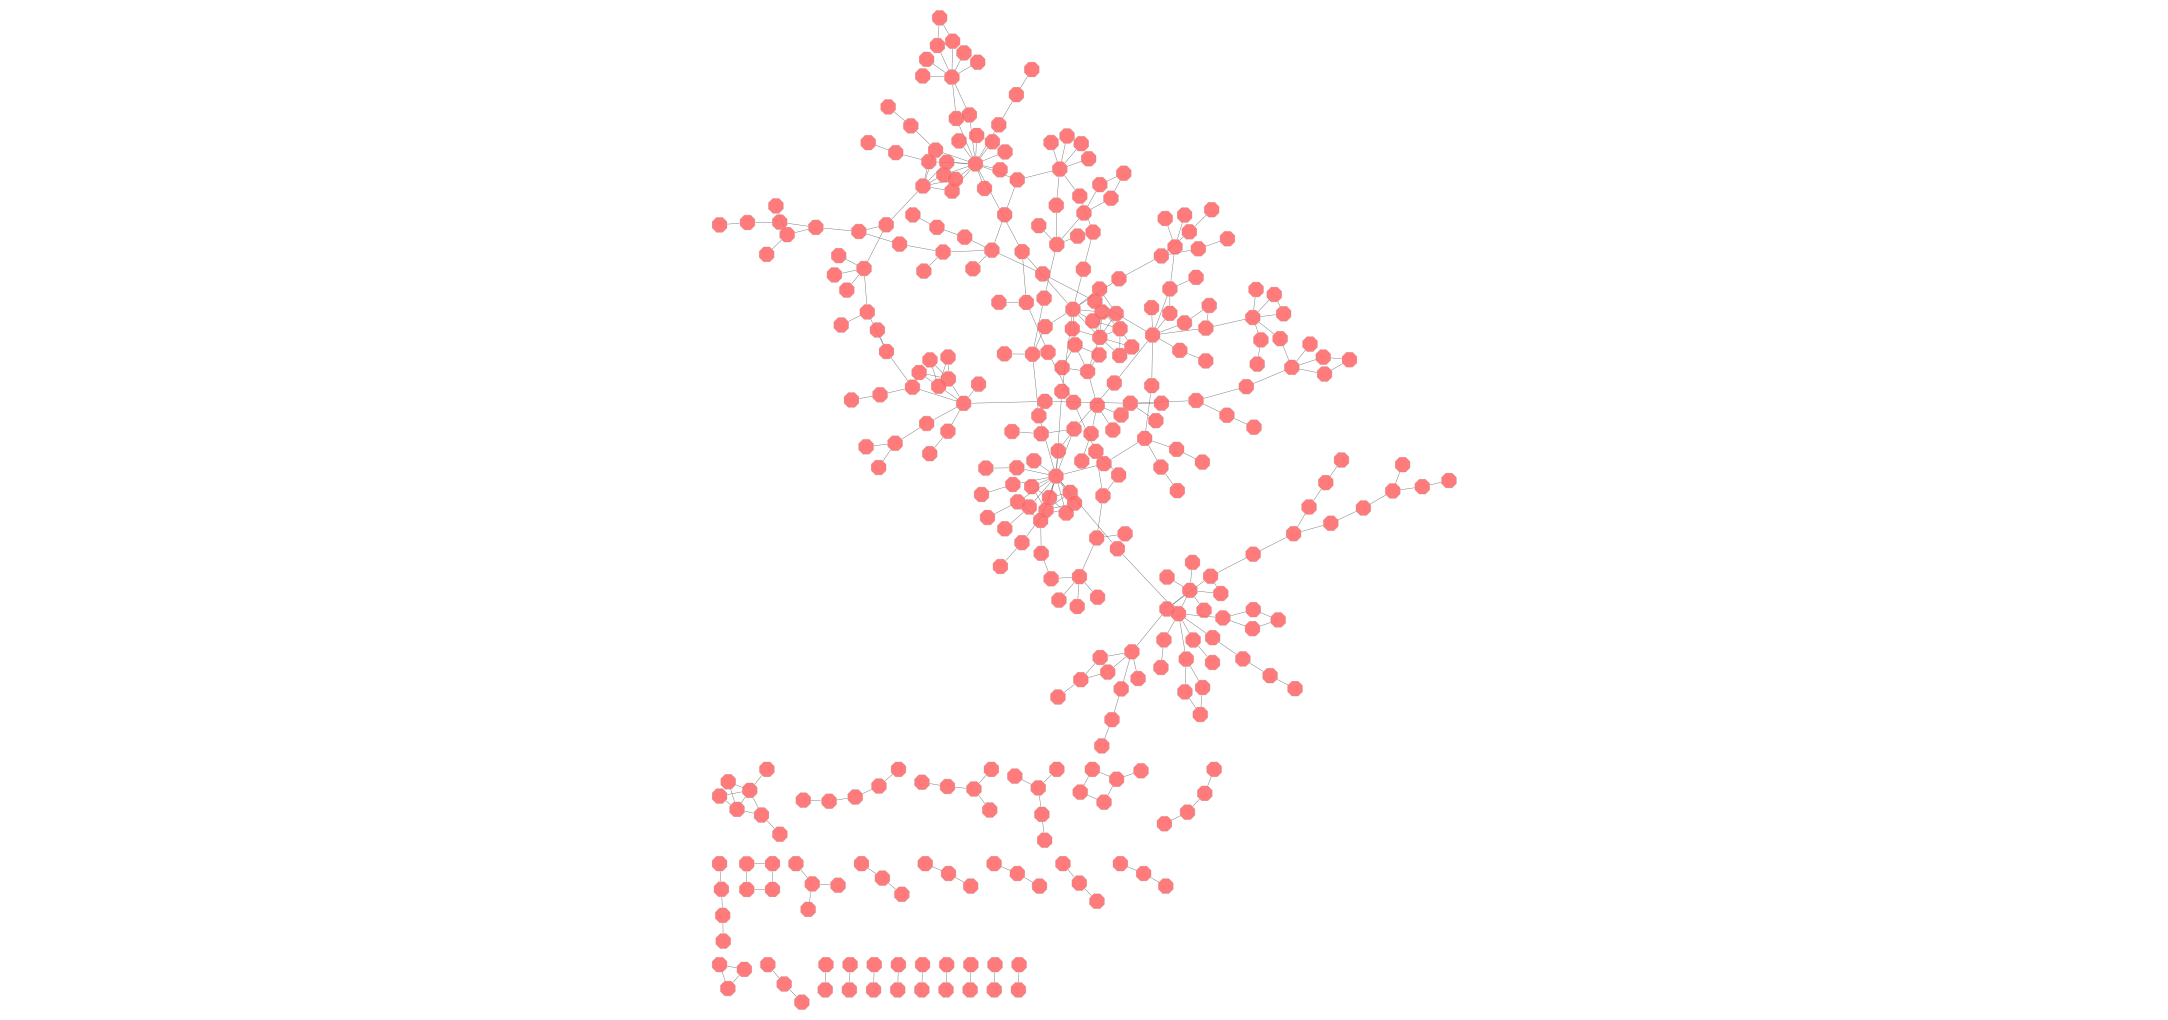

In [72]:
from IPython.display import Image

p4c.sandbox_remove_file('HIV-human PPI.png')
res = p4c.export_image('HIV-human PPI')
assert(type(res) is dict)
assert('file' in res)
print('Successfully exported HIV-human PPI network')
p4c.sandbox_get_from('HIV-human PPI.png', OUTPUT_DIR + 'HIV-human PPI.png')
Image(filename=OUTPUT_DIR + 'HIV-human PPI.png')


---
#Demo: Export filters and upload to Google Drive

assert() checks verify that function result was plausible

In [73]:
p4c.sandbox_remove_file('filters.json')
res = p4c.export_filters()
assert(type(res) is list)
assert(len(res) == 0)
print('Successfully exported filters to filters.json')
p4c.sandbox_get_from('filters.json', OUTPUT_DIR + 'filters.json')


Successfully exported filters to filters.json


{'fileByteCount': 1529,
 'filePath': 'C:\\Users\\CyDeveloper\\CytoscapeConfiguration\\filetransfer\\default_sandbox\\filters.json',
 'modifiedTime': '2020-10-26 12:07:30.0473'}

---
#Demo: Download and load custom filters

Note that these custom filters don't match the network they're loaded into. They won't do much.

assert() checks verify that function result was plausible

In [74]:
p4c.sandbox_remove_file('All Predicates.filter')
p4c.sandbox_send_to(DATA_DIR + 'All Predicates.filter')
res = p4c.import_filters(filename='All Predicates.filter')
assert(type(res) is list)
assert(len(res) == 0)
print('Successfully loaded from custom filters file')

Successfully loaded from custom filters file


#App: Create networks, calculate clusters, and show subnetworks

---
##App Part 1: Load sample session and calculate edges
**Note that this uses the Cytoscape session already loaded into the Cytoscape sandbox by default.**

The output will be a dataframe that shows the network's edges.

In [75]:
 import uuid
 import re
 import pandas as df
 import time


 p4c.open_session('sampleData/sessions/Affinity Purification.cys')
 edges = p4c.get_all_edges()
 sources = [re.match('(\S*) \(.*\) (\S*)', edge).group(1)   for edge in edges]
 targets = [re.match('(\S*) \(.*\) (\S*)', edge).group(2)   for edge in edges]
 edge_data = {'source': sources, 'target': targets}

 edges_frame = df.DataFrame(data=edge_data, columns=['source', 'target'])
 edges_frame

Opening C:\Users\CyDeveloper\CytoscapeConfiguration\filetransfer\default_sandbox/sampleData/sessions/Affinity Purification.cys...


,source,target
0,Q07065,Q07065
1,Q96R06,Q13283
2,P35232,O14980
3,P55884,Q13347
4,P55884,Q13347
...,...,...
1212,Q9C0C7,Q9C0C7
1213,O75955,P05067
1214,O75955,P05067
1215,P29372,P29372


---
##App Part 2: Create a fresh network out of just the edges

The time reported should be less than 30s.

In [76]:
network_name = uuid.uuid4().hex
start_create = time.monotonic()
network_suid = p4c.networks.create_network_from_data_frames(edges=edges_frame, title=network_name, collection=network_name + '_collection')
print(f'create took {(time.monotonic() - start_create):10.2f} seconds')

Applying default style...
Applying preferred layout
create took      20.80 seconds


---
## App Part 3: Call MCODE to calculate clusters

**Note that py4cytoscape doesn't have a function that calls MCODE. Instead, we use the commands_post technique documented here: https://py4cytoscape.readthedocs.io/en/latest/concepts.html#calling-cytoscape-apps**

The output is a list of clusters that have more than 3 nodes.

Note that you must have MCODE app installed in Cytoscape for this to work.

In [77]:
start_mcode = time.monotonic()
mcode = p4c.commands.commands_post('mcode cluster degreeCutoff=2 fluff=false fluffNodeDensityCutoff=0.1 haircut=true includeLoops=false kCore=2 maxDepthFromStart=100 network=current nodeScoreCutoff=0.2 scope=NETWORK')
print(f'mcode took {(time.monotonic() - start_mcode):10.2f} seconds')

big_clusters = [i for i in range(len(mcode['clusters'])) if len(mcode['clusters'][i]['nodes']) > 3]
big_clusters

mcode took      16.18 seconds


[0, 1, 2, 3, 4, 11]

---
## App Part 4: Image each cluster and upload to Google Drive

**At the end of this cell, all .png images are displayed.**

Because the .png is created in the Cytoscape sandbox, it must be uploaded to this Notebook's file system before it can be viewed.

There is a call to get_table_columns() that is never used, but it sure takes a while. It's here just to show that Cytoscape can be called for a long operation.

0 view took       8.87 seconds
0 append took       6.65 seconds
0 export took       4.56 seconds
1 view took       7.27 seconds
1 append took       6.54 seconds
1 export took       5.47 seconds
2 view took       7.47 seconds
2 append took       6.56 seconds
2 export took       4.21 seconds
3 view took       8.17 seconds
3 append took       6.55 seconds
3 export took       3.77 seconds
4 view took       8.07 seconds
4 append took       6.56 seconds
4 export took       4.00 seconds
5 view took       7.27 seconds
5 append took       6.75 seconds
5 export took       3.97 seconds


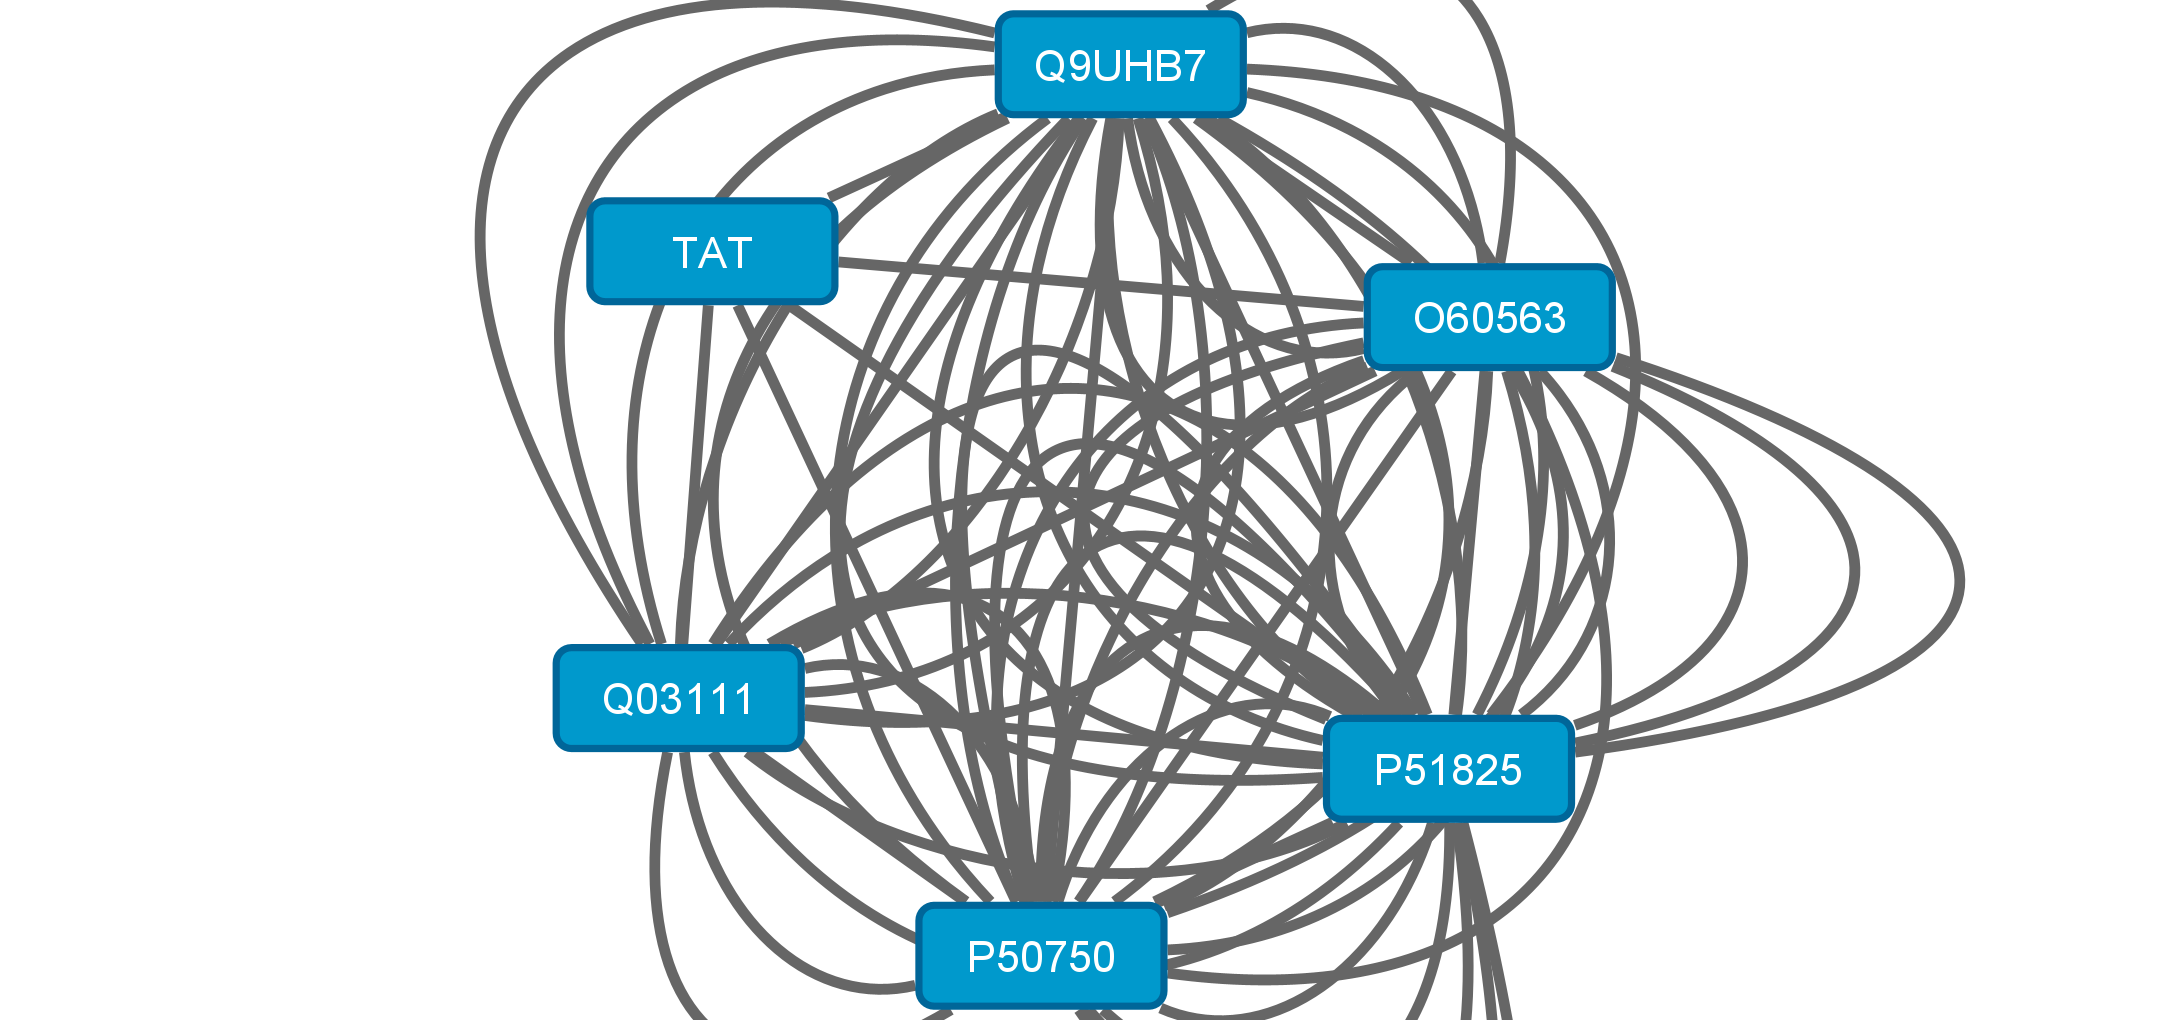

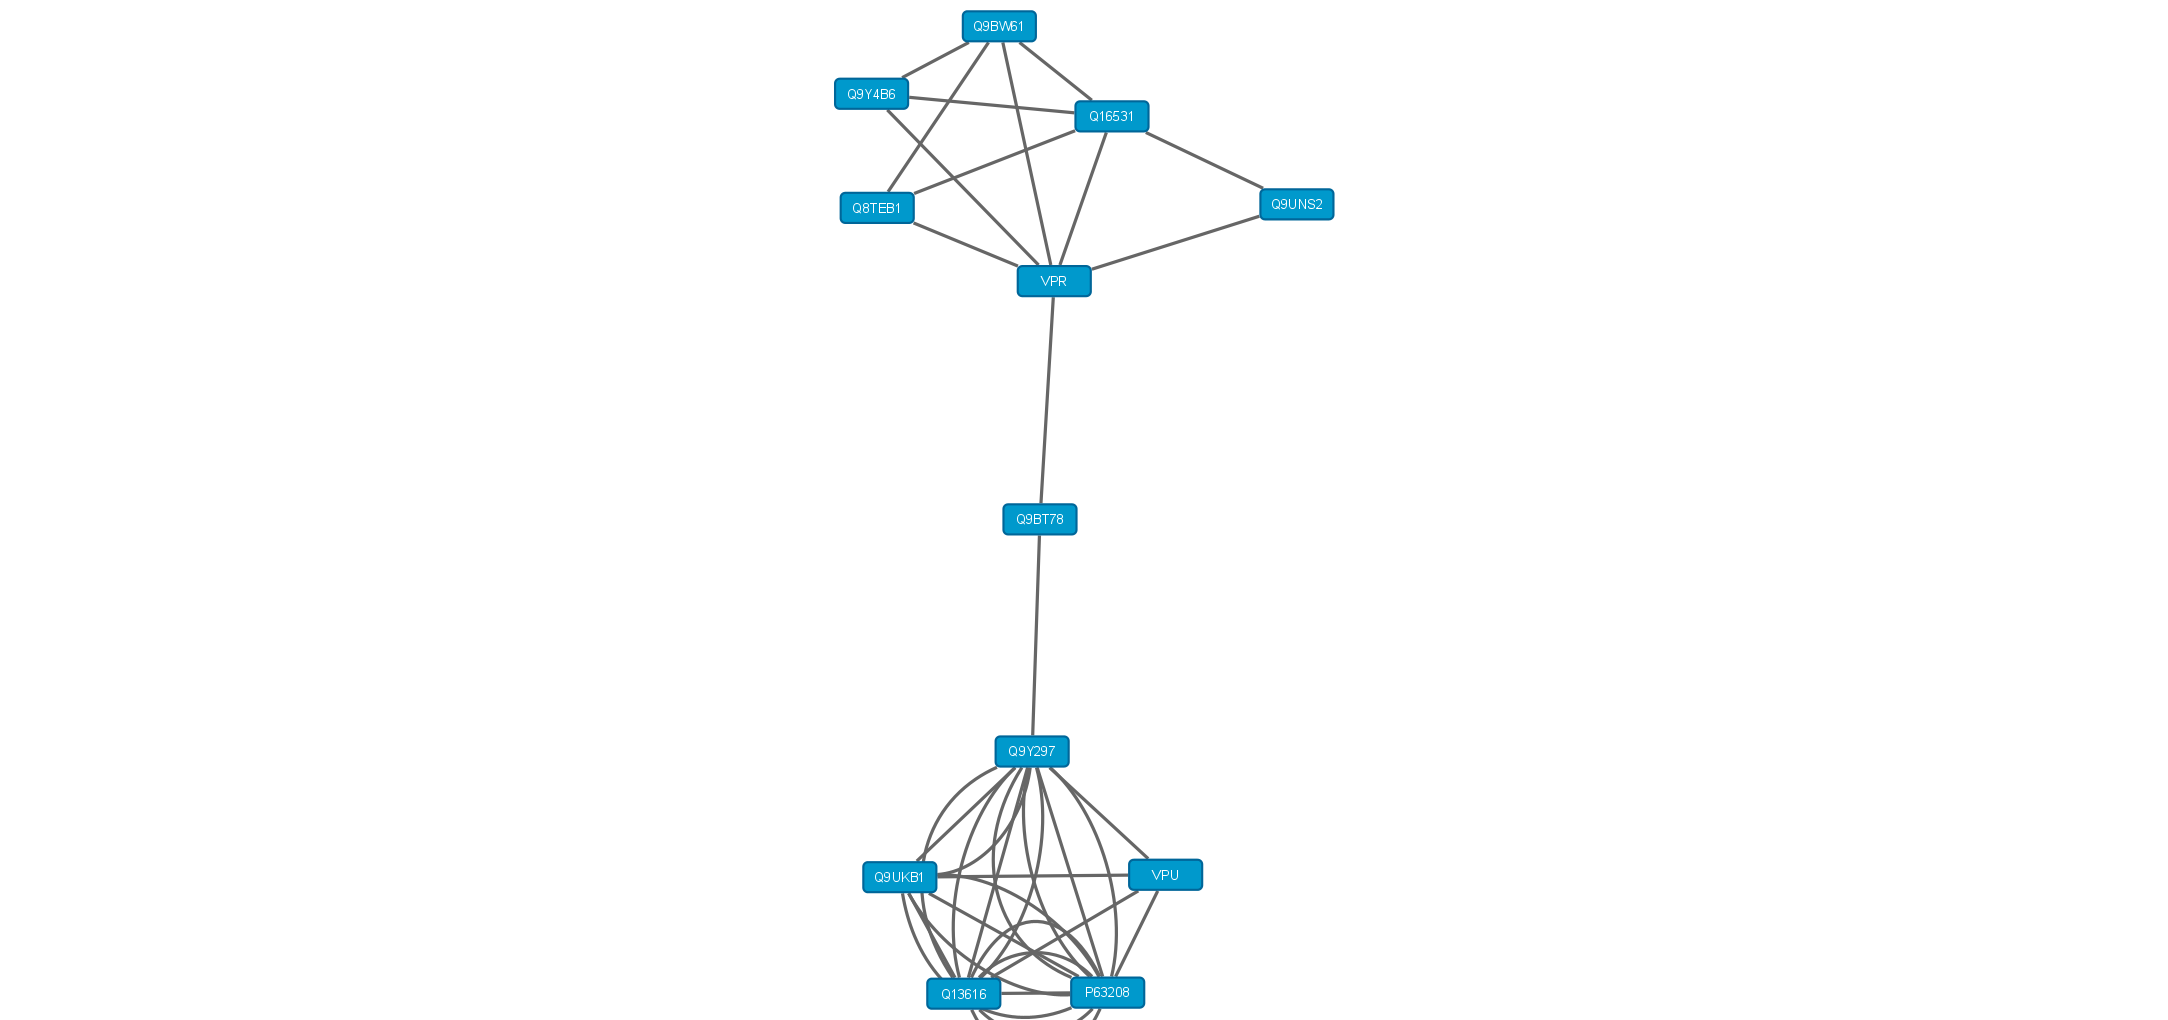

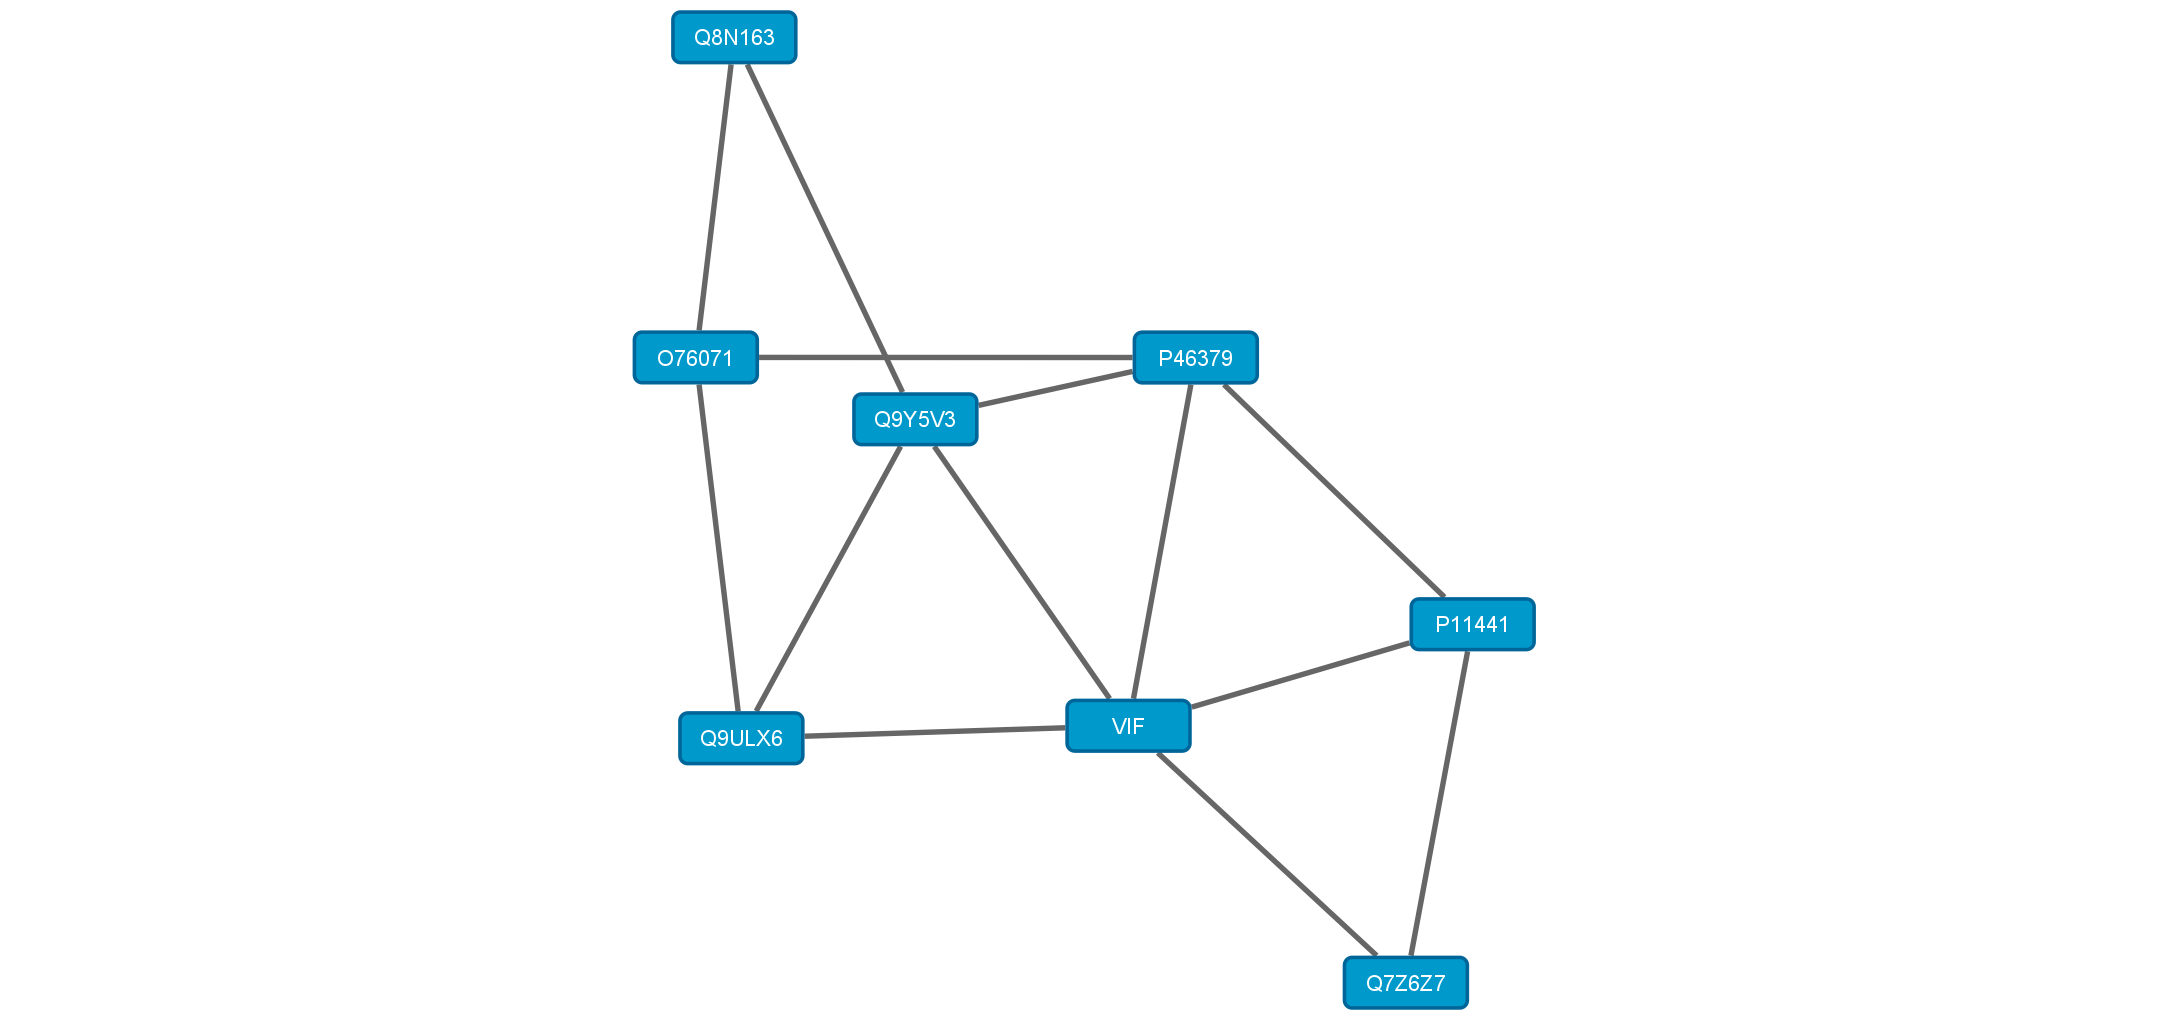

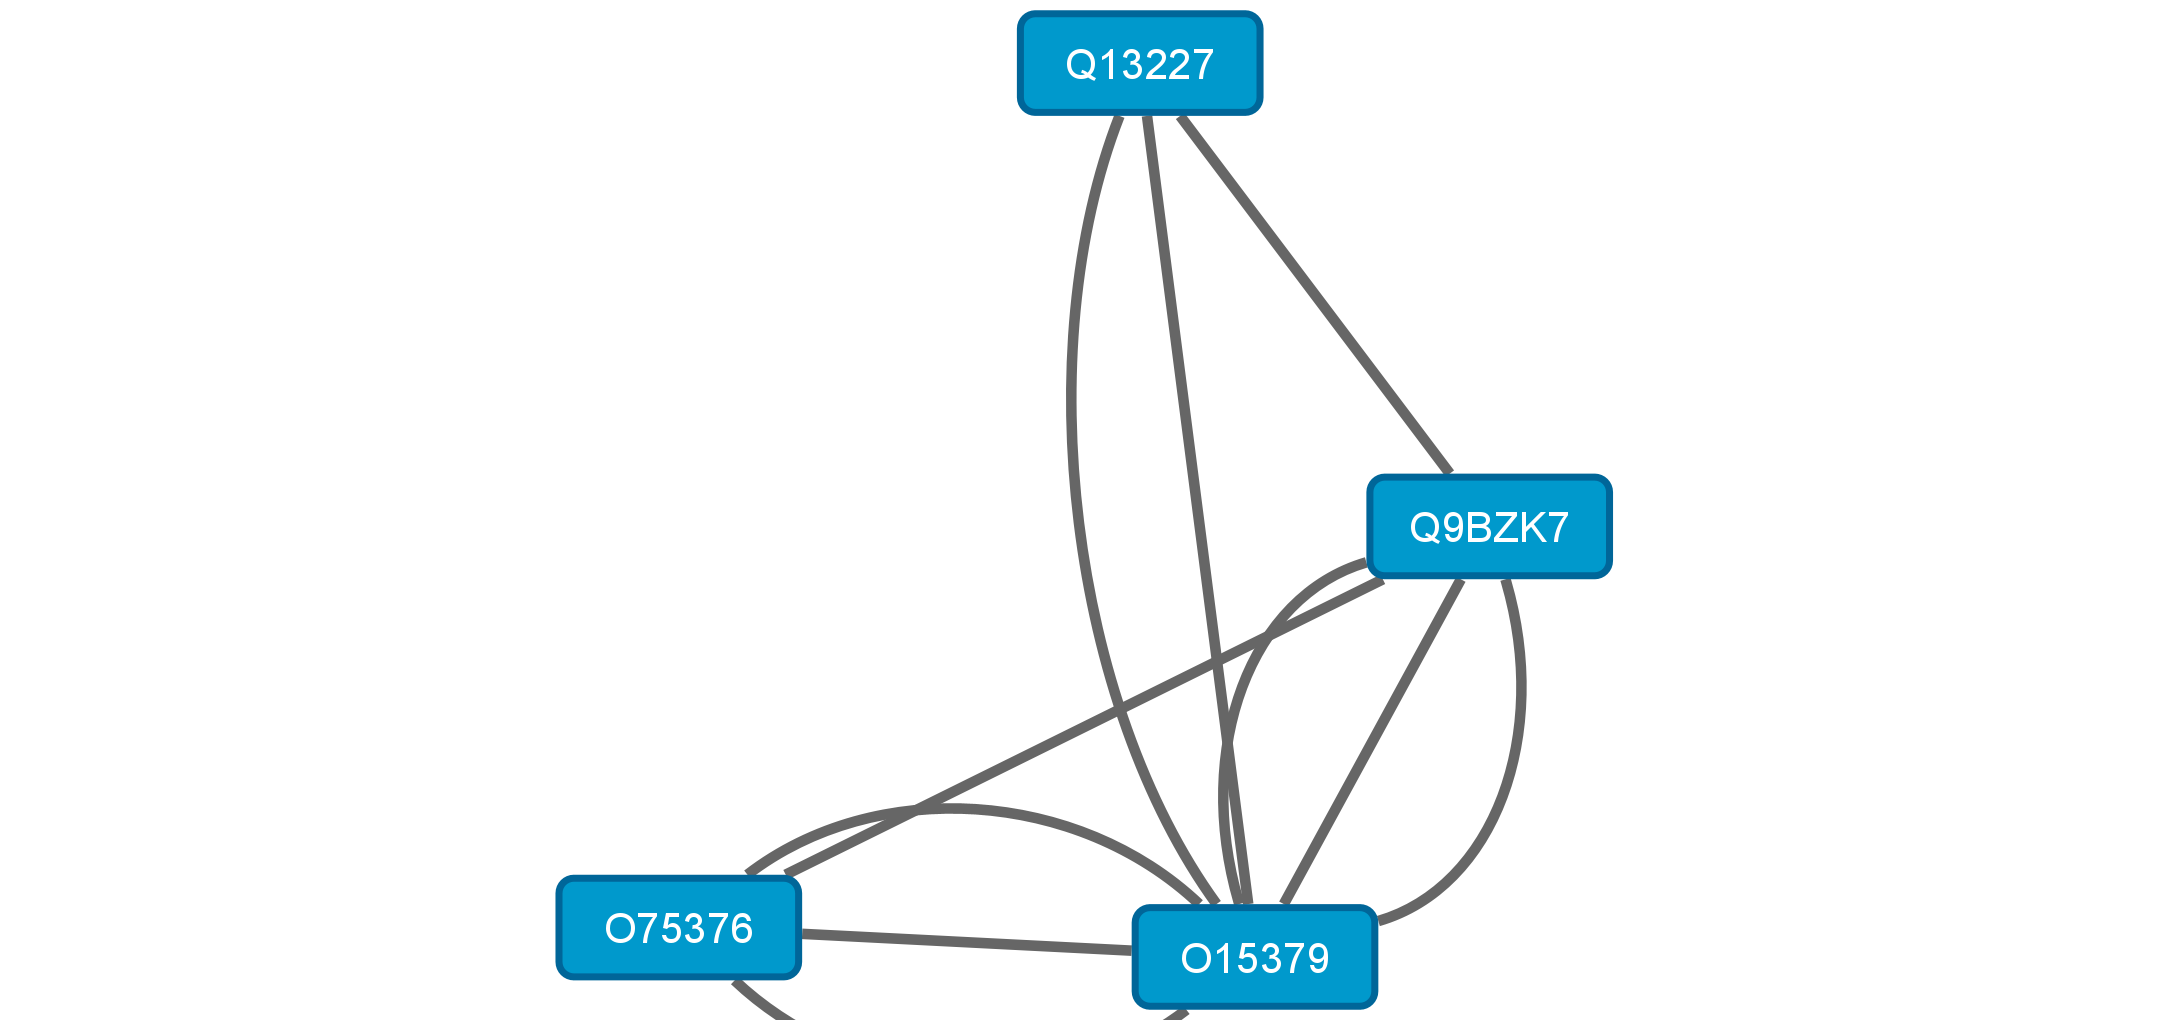

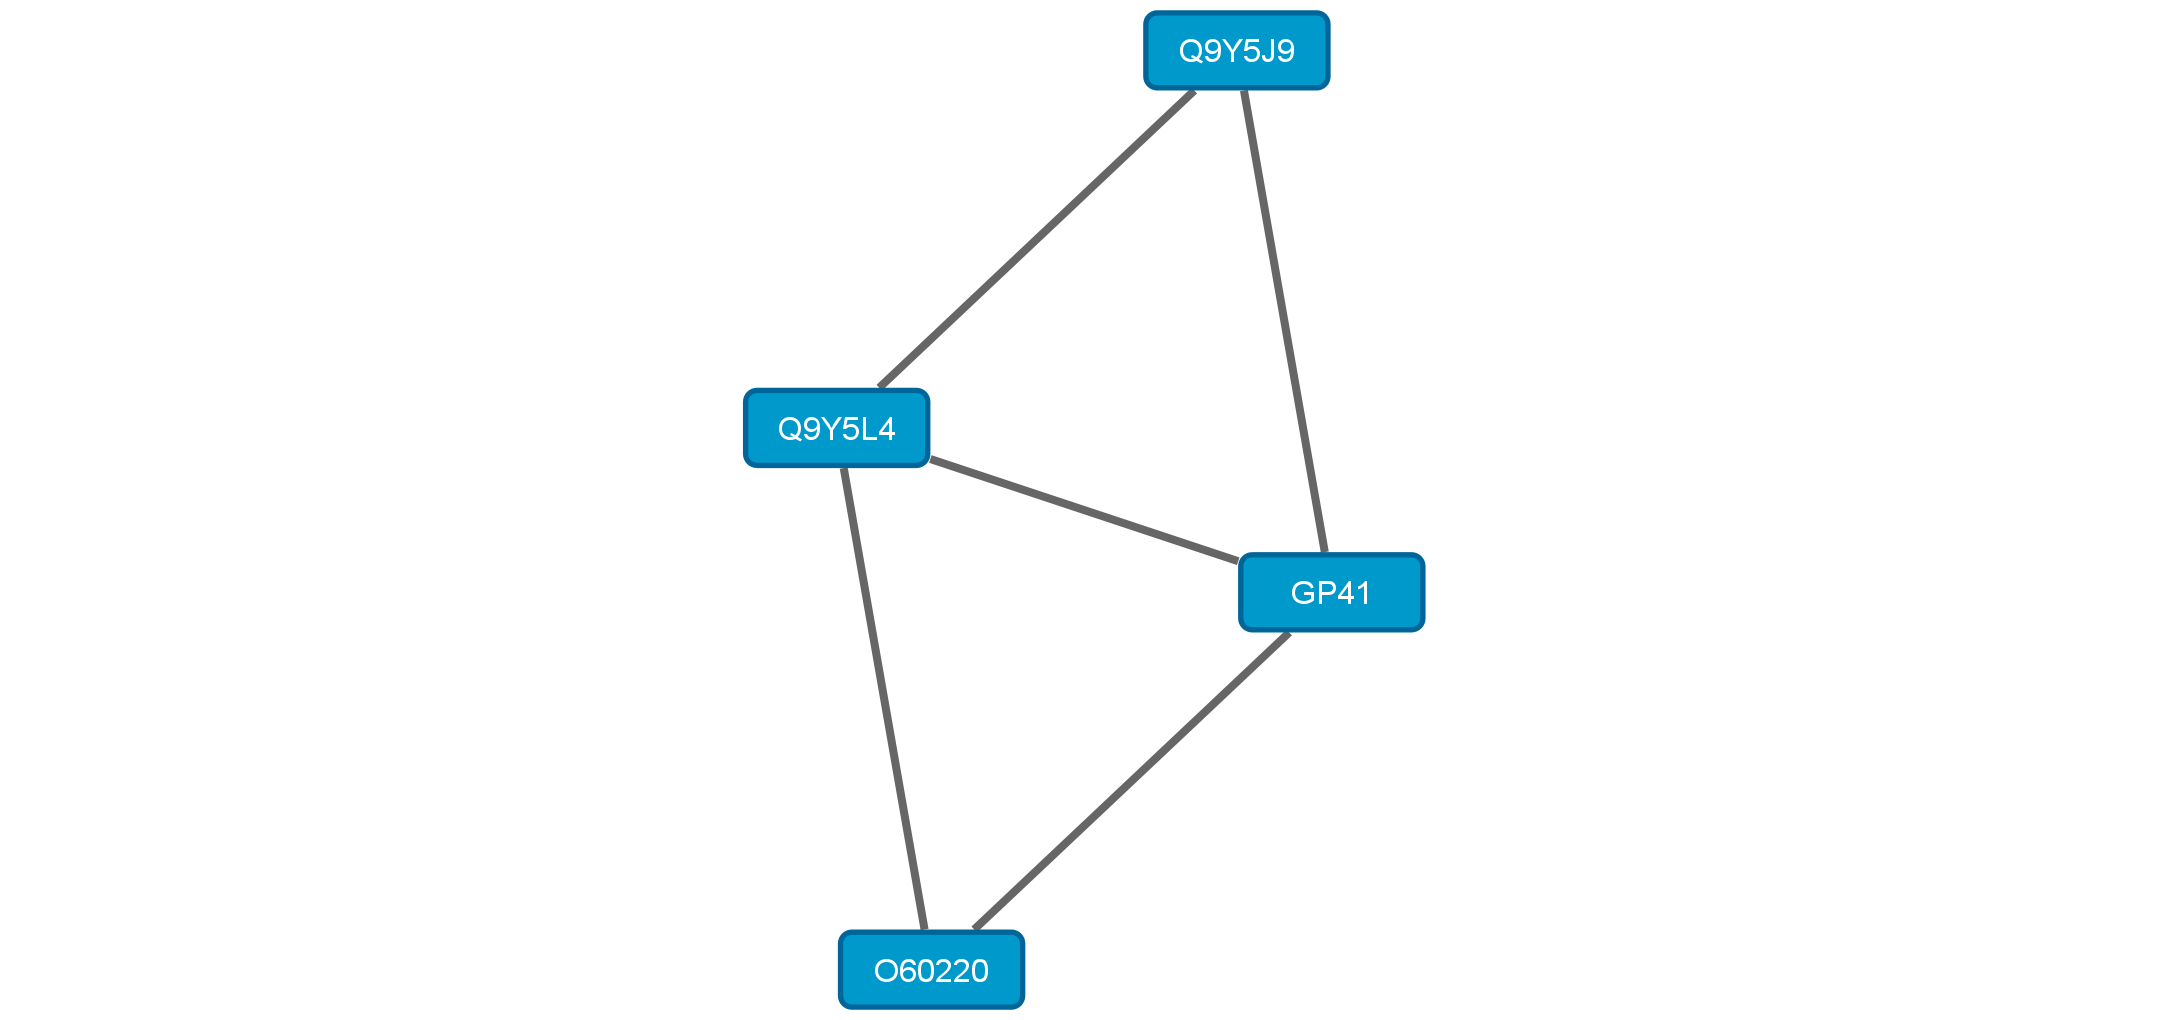

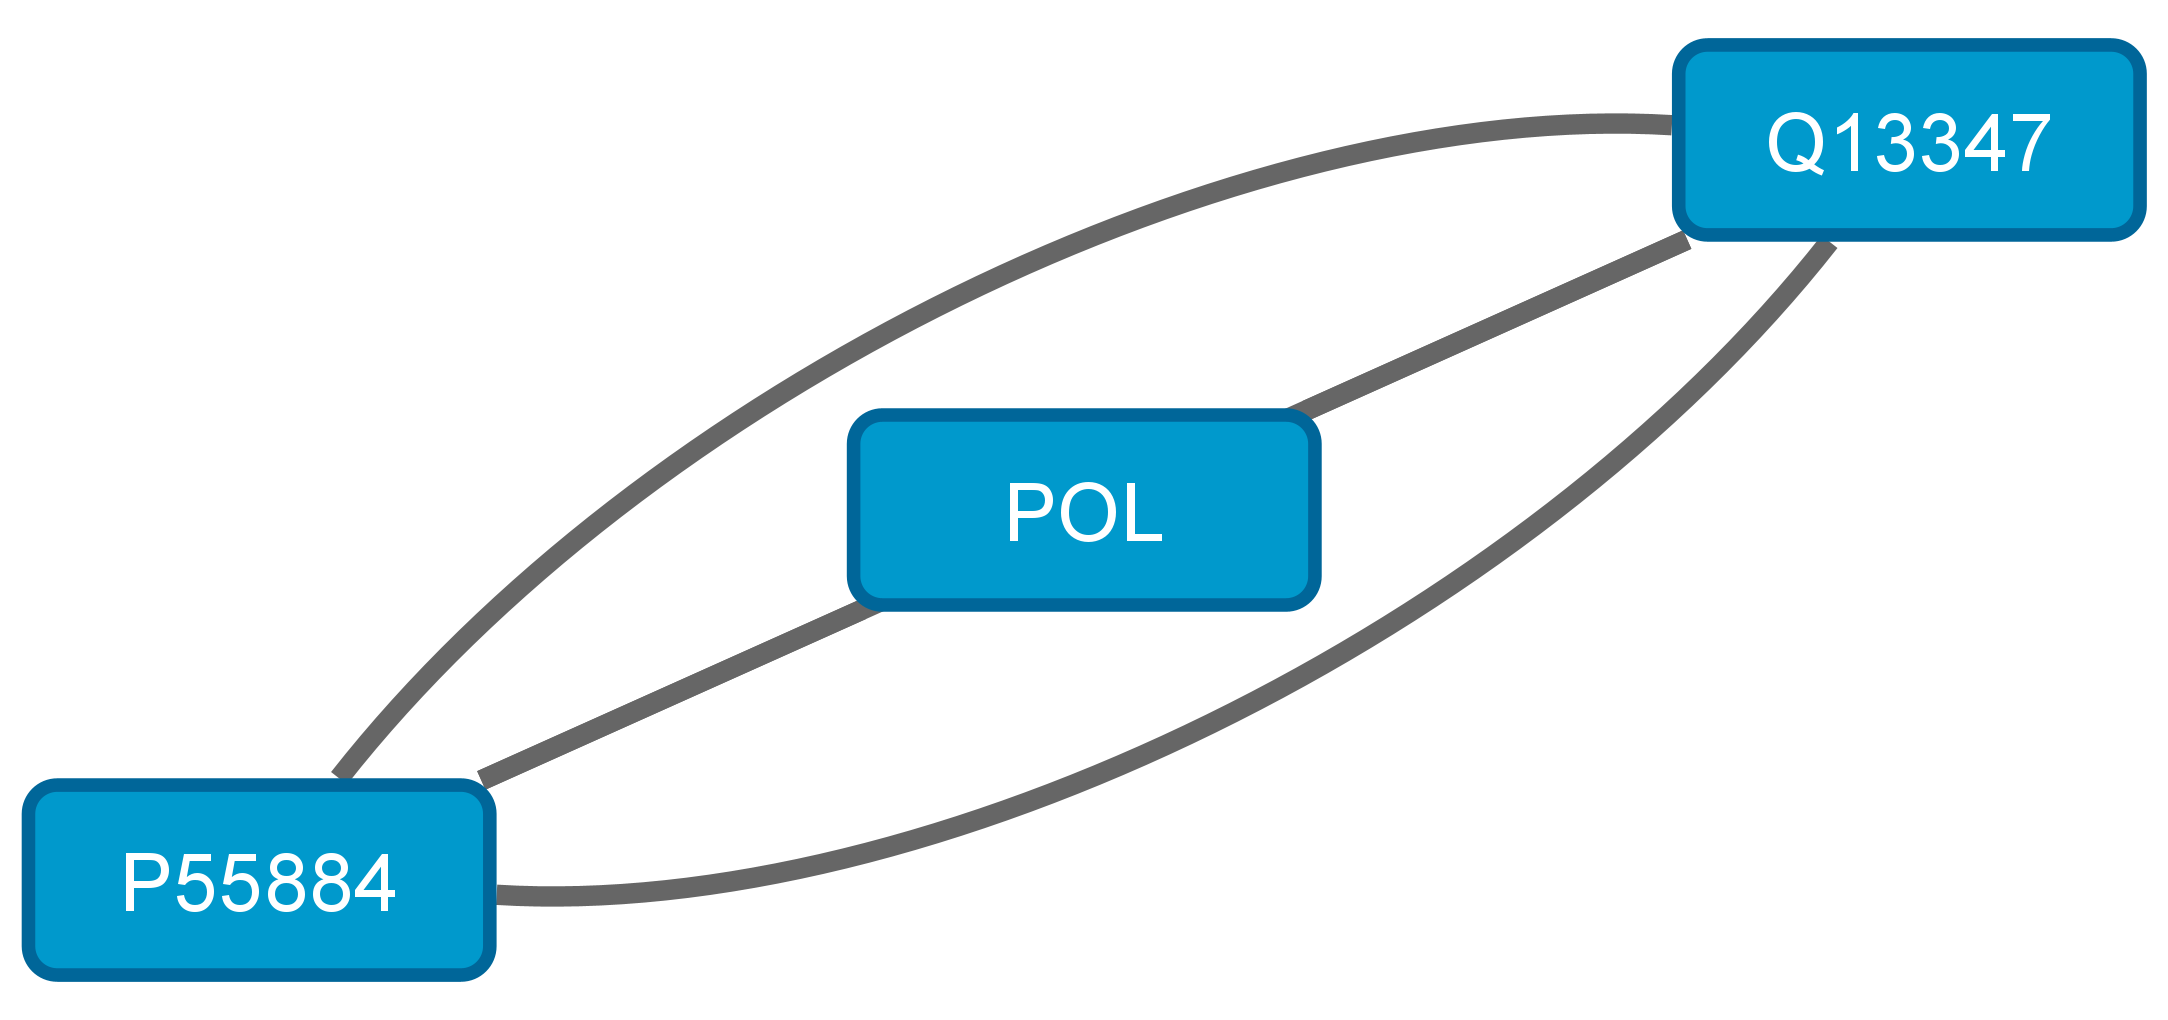

In [78]:
from IPython.display import Image, display
import os

if not os.path.exists('data'):  os.mkdir('data') # Prepare for .png files

clusters = []
list_of_images = []
for i in range(len(big_clusters)):
    start_view = time.monotonic()
    view_id = p4c.commands.commands_post('mcode view id=1 rank=' + str(i+1))
    print(f'{i} view took {(time.monotonic() - start_view):10.2f} seconds')

    start_append = time.monotonic()
    # Just for fun, show how to get a dataframe that is manipulated in Python. 
    clusters.append( p4c.tables.get_table_columns()
                      .drop(columns=['id','name','selected','MCODE::Clusters','SUID'])
                      .sort_values(by=['MCODE::Score'], ascending=False)
                      .reset_index(drop=True) )
    print(f'{i} append took {(time.monotonic() - start_append):10.2f} seconds')

    img_name = uuid.uuid4().hex
    start_export = time.monotonic()
    p4c.export_image(f'{img_name}')
    p4c.sandbox_get_from(f'{img_name}.png', f'{OUTPUT_DIR}{img_name}.png')
    p4c.sandbox_remove_file(f'{img_name}.png')
    print(f'{i} export took {(time.monotonic() - start_export):10.2f} seconds')
    list_of_images.append(f'{OUTPUT_DIR}{img_name}.png')
    
# Show all of the clusters
for image_name in list_of_images:
    display(Image(filename=image_name))